In [2]:
# %pip install gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [2]:
sentences = [['human', 'interface', 'computer'],
            ['survey', 'user', 'computer', 'system', 'response', 'time'],
            ['eps', 'user', 'interface', 'system'],
            ['system', 'human', 'system', 'eps'],
            ['user', 'response', 'time'],
            ['trees'],
            ['graph', 'trees'],
            ['graph', 'minors', 'trees'],
            ['graph', 'minors', 'survey']]

Training the word2vec

In [11]:
# model = Word2Vec(sentences=sentences, min_count=1)
model = Word2Vec(sentences=sentences, min_count=1, vector_size=10)

In [12]:
# printing out vector for the word "trees"
print(model.wv['trees'])

[ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]


In [10]:
# The similarity score ranges from -1 (dissimilar) to 1 (similar)
similarity_score = model.wv.similarity('human','computer')
print(similarity_score)

-0.0742427


In [15]:
# find and print top 10 most similar words to 'computer'
similar_words = model.wv.most_similar('computer', topn=10)
similar_words

[('system', 0.21617139875888824),
 ('survey', 0.04468922317028046),
 ('interface', 0.015203381888568401),
 ('time', 0.0019510635174810886),
 ('trees', -0.03284316882491112),
 ('human', -0.07424270361661911),
 ('response', -0.09317591041326523),
 ('graph', -0.09575342386960983),
 ('eps', -0.10513808578252792),
 ('user', -0.16911619901657104)]



---



# **Visualising Word vectors **

**The need for vector visualisation**

When working with word embeddings like Word2Vec, each word is typically represented as a vector of several hundred dimensions. Visualizing these vectors directly is impractical due to their high dimensionality. Therefore, reducing their dimensionality while preserving their semantic meaning is crucial for effective visualization.


PCA -

Principal Component Analysis (PCA) is a powerful technique used to reduce the dimensionality of data while retaining as much variance as possible. In the context of word embeddings, PCA can transform high-dimensional word vectors into a lower-dimensional space (e.g., 2D or 3D), making them suitable for visualization on a graph.



In [14]:
import  matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

Performing PCA

In [15]:
vectors = [model.wv[word] for word in model.wv.index_to_key]

pca = PCA(n_components=2)
final_vec = pca.fit_transform(vectors)

visualising the word vectors

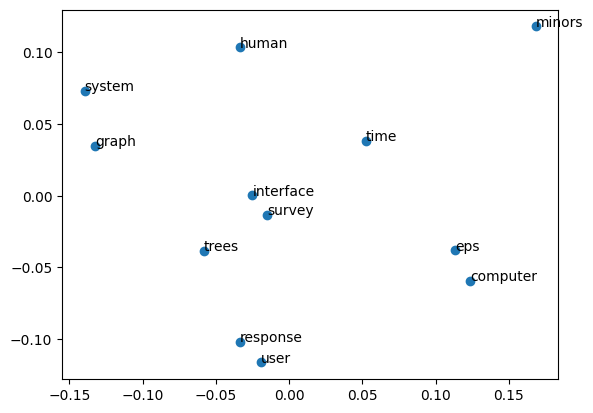

In [16]:
# Scatter plot of the final 2-dimensional vectors after PCA
plt.scatter(final_vec[:, 0], final_vec[:, 1])

words = model.wv.index_to_key

for i, word in enumerate(words):
  plt.annotate(word, xy=(final_vec[i][0], final_vec[i][1]))

plt.show()



---



# **Training Word2Vec on a large corpus**

In recent discussions, we've explored how to implement the Word2Vec algorithm. However, our previous training was conducted on a very small corpus. Now, we will extend this approach to a significantly larger dataset, containing around 17 million words and a vocabulary size of approximately 55,000 unique terms. This article will guide you through the process of training the Word2Vec model on this extensive dataset, using the Gensim library in Python.

Preparing the environment

In [34]:
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tqdm import tqdm

In [35]:
dataset = api.load('text8')

In [36]:
words = [word for word in tqdm(dataset)]
print(words[:100])

1701it [00:07, 234.94it/s]


[['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers', 'to', 'related', 's

In [37]:
corpus = words
# now corpus consists of vairous values and each value has sentences. so each sentence has various words

Training the Word2Vec model

In [38]:
from gensim.models import Word2Vec

# getting the words out of each of the sentence on each index of corpus
flattened_corpus = [word for sentence in corpus for word in sentence]

model = Word2Vec(sentences=[flattened_corpus], vector_size=100, window=4, workers=4, min_count=1)

Evaluating the model

In [42]:
print(model.wv.most_similar('king'))

[('gebirtig', 0.42499035596847534), ('manuva', 0.4237450957298279), ('carpetbagging', 0.4152790606021881), ('coiffure', 0.41511476039886475), ('tix', 0.4138281047344208), ('benicio', 0.40395301580429077), ('rhahzadh', 0.40306204557418823), ('gemeente', 0.3989943861961365), ('denotation', 0.39715245366096497), ('reef', 0.3896772861480713)]


Visualising word vectors

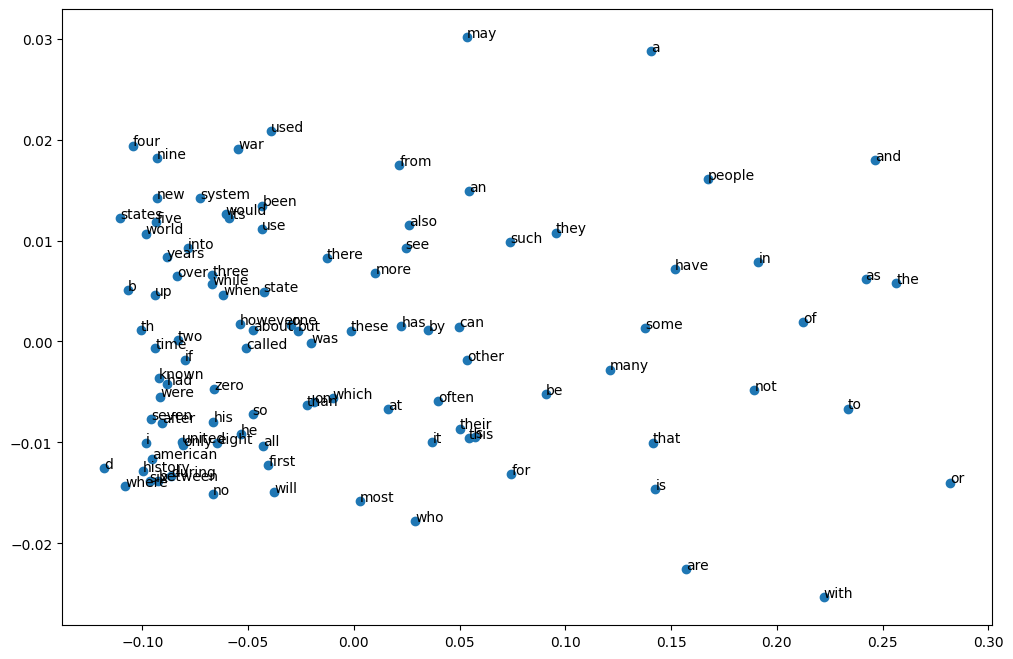

In [40]:
def plot_words(model):
    words = list(model.wv.index_to_key)[:100]  # Plotting only the first 100 words for clarity
    vectors = [model.wv[word] for word in words]

    pca = PCA(n_components=2)
    result = pca.fit_transform(vectors)

    plt.figure(figsize=(12, 8))
    plt.scatter(result[:, 0], result[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()

plot_words(model)



---



#**Training the Word2Vec and analysing the output**

In [46]:
import gensim.downloader as api
from gensim.models import Word2Vec
from tqdm import tqdm

In [47]:
corpus = api.load('text8')

In [49]:


corpus = [word for word in tqdm(corpus)]

# Initialize an empty string to hold the concatenated text of the corpus.
corpora = ''

# Concatenate all the words in the corpus into a single string, separated by spaces.
for corp in tqdm(corpus, desc="Processing corpus", unit="c"):
  corpora += ' '.join(corp)

print(f"Corpus Size: {len(corpora.split(' '))}")
print(f"Vocab Size: {len(set(corpora.split(' ')))}")

Processing corpus: 100%|██████████| 1701/1701 [01:01<00:00, 27.52c/s]


Corpus Size: 17003507
Vocab Size: 255310


In [51]:
model = Word2Vec(corpus, min_count=5, vector_size=300, window=3, sg=0, epochs=5)


In [53]:
model.wv.most_similar('first',topn=3)
# displays most closest words to first

[('second', 0.6010524034500122),
 ('last', 0.5869751572608948),
 ('fourth', 0.5505250692367554)]

In [55]:
model.wv.most_similar('car',topn=10)

[('motorcycle', 0.7160736918449402),
 ('cars', 0.7066744565963745),
 ('driver', 0.7035232782363892),
 ('taxi', 0.6836235523223877),
 ('vehicle', 0.637083888053894),
 ('truck', 0.6174875497817993),
 ('automobile', 0.5944417119026184),
 ('passenger', 0.5903550386428833),
 ('aircraft', 0.5886540412902832),
 ('racing', 0.58800208568573)]

In [56]:
model.wv.most_similar('india',topn=3)

[('pakistan', 0.7442038059234619),
 ('china', 0.6752214431762695),
 ('africa', 0.6612691879272461)]

In [57]:
model.wv.similarity('car','truck')

0.61748767

In [59]:
model.wv.similarity('beautiful','pretty')

0.50049263

In [60]:
# Compute the cosine similarity between the words 'good' and 'bad' using the trained Word2Vec model
model.wv.similarity('good', 'bad')

0.71112144

# Reducing the previous vectors Dimensions with PCA

In [1]:
import gensim.downloader as api
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [2]:
corpus = api.load('text8')
# Flatten the corpus into a single list of words
corpus = [word for word in corpus]

[==================================================] 100.0% 31.6/31.6MB downloaded


In [3]:
# Train Word2Vec model
model = Word2Vec(corpus, min_count=2000, vector_size=300, window=3, sg=0, epochs=5)

**Reducing the dimensions**

In [4]:
# extract the word vector and corresponding words
X = [model.wv[word] for word in model.wv.index_to_key] #this contains all the vectors for each word
words = list(model.wv.index_to_key) #this contains all the words raw.

In [5]:
# Print dimensions of vectors before PCA
print('Dimensions of each Vector | Before : ', len(X[0]))

Dimensions of each Vector | Before :  300


In [6]:
pca = PCA(n_components=2) #means each word will have 2 dimention vector (before it was 300)
result = pca.fit_transform(X)

In [7]:
print('Dimension of each Vector | After :', len(result[0]))


Dimension of each Vector | After : 2


In [8]:
# Store PCA results and corresponding words in a dictionary
data = {'x': result[:,0], 'y': result[:,1], 'label': words}

{'x': array([ 4.42857086e-01,  2.99155397e-01,  1.36015591e-01,  6.12817873e+00,
        1.71043769e+00, -1.40368344e+00, -1.47991184e+00,  4.94664099e+00,
        7.92174267e+00,  4.41544315e+00, -3.39417396e+00, -1.66668971e+00,
        7.27752752e+00, -1.22852034e+00,  2.52040217e+00,  5.95522866e+00,
        5.10774335e+00,  3.53435669e+00,  5.85342180e-01, -3.59542686e+00,
        5.84653484e+00,  6.15923932e+00,  7.05361000e+00, -7.02944936e-01,
        5.02373659e-01, -5.05717055e+00, -2.48429312e+00,  2.50882887e-01,
       -4.14798971e+00,  2.71367559e+00, -1.03619358e+00, -5.48388155e+00,
       -3.04491784e+00, -1.79404793e+00,  1.98569574e+00,  3.02242495e+00,
       -1.04325126e+00, -4.24867341e+00, -4.24950950e+00,  1.11916391e+00,
       -1.76268446e+00, -2.14807316e+00, -3.34778077e+00, -2.19542207e+00,
       -8.95568139e-01,  3.17761801e+00, -3.18339229e+00, -3.83789151e+00,
        2.27329651e+00, -2.19056436e+00, -3.07278933e+00, -1.52760326e+00,
       -7.28074779e

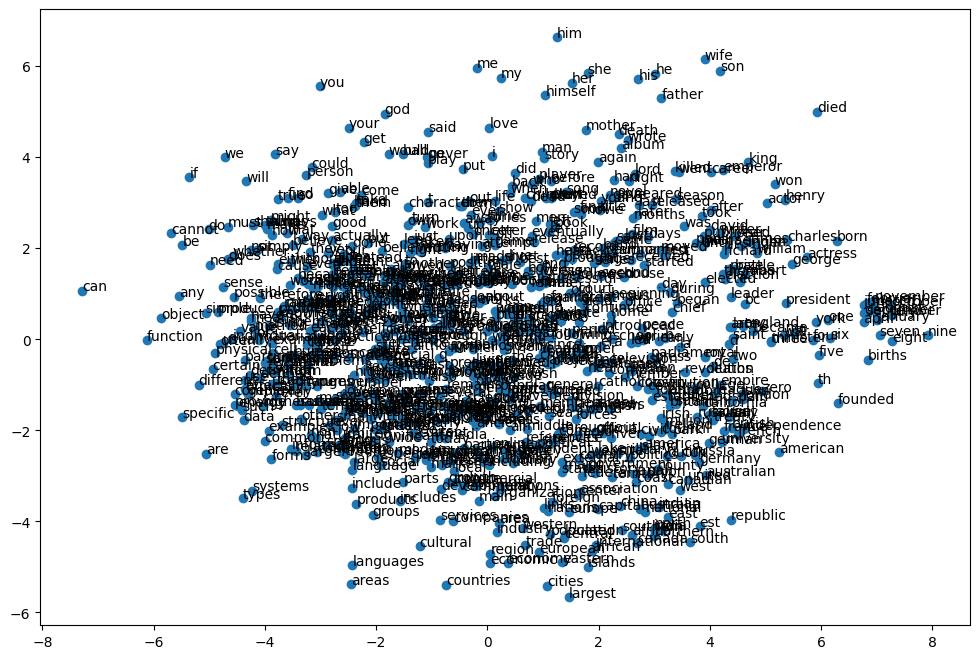

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df['x'], df['y'])

# Add word annotations to the plot
for i, row in df.iterrows():
    plt.annotate(row['label'], xy=(row['x'], row['y']))

# Display the plot
plt.show()